In [1]:
import rasterio as rio
path= "20190110_IOM_NPM_SA15_Imagery_Camp 01E.tif"
rio.open(path)

<open DatasetReader name='20190110_IOM_NPM_SA15_Imagery_Camp 01E.tif' mode='r'>

In [2]:
data = rio.open(path)

In [3]:
data.crs

CRS.from_epsg(32646)

In [4]:
data.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 12638,
 'height': 11927,
 'count': 3,
 'crs': CRS.from_epsg(32646),
 'transform': Affine(0.10107999999999824, 0.0, 411752.82440000004,
        0.0, -0.10108000000000501, 2346917.34573)}

In [5]:
image_allbands = data.read()
image_allbands

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [6]:
from rasterio.plot import show

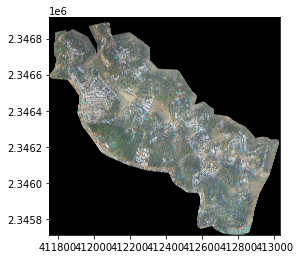

<AxesSubplot:>

In [8]:
show(data)

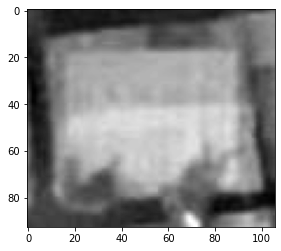

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "training/"
CATEGORIES = ["residence", "office"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
print(img_array)

[[117 119 118 ... 136 144 144]
 [120 121 120 ... 153 162 162]
 [121 122 120 ... 170 173 173]
 ...
 [119 120 122 ... 160 145 130]
 [117 118 120 ... 172 148 133]
 [115 116 118 ... 179 151 134]]


In [21]:
print(img_array.shape)

(93, 106)


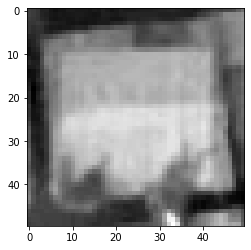

In [22]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [23]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [24]:
print(len(training_data))

36


In [25]:
import random

random.shuffle(training_data)

In [26]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
0
1
1
0
0


In [27]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[157]
   [156]
   [158]
   ...
   [120]
   [125]
   [130]]

  [[146]
   [145]
   [144]
   ...
   [122]
   [126]
   [128]]

  [[135]
   [135]
   [135]
   ...
   [124]
   [126]
   [127]]

  ...

  [[141]
   [144]
   [153]
   ...
   [117]
   [112]
   [109]]

  [[158]
   [169]
   [179]
   ...
   [107]
   [106]
   [103]]

  [[179]
   [188]
   [197]
   ...
   [108]
   [114]
   [120]]]]


In [28]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [29]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

gpu_options = tf.GPUoptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=4, epochs=3, validation_split=0.2)

Epoch 1/3
7/7 [==============================] - 2s 52ms/step - loss: 0.6771 - accuracy: 0.5673 - val_loss: 0.6158 - val_accuracy: 0.6250
Epoch 2/3
7/7 [==============================] - 0s 6ms/step - loss: 0.6133 - accuracy: 0.7025 - val_loss: 0.6120 - val_accuracy: 1.0000
Epoch 3/3
7/7 [==============================] - 0s 6ms/step - loss: 0.5769 - accuracy: 0.8793 - val_loss: 0.6138 - val_accuracy: 0.6250


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

In [3]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.save('1_model.h5')

In [5]:
import cv2
import tensorflow as tf
CATEGORIES = ["residence", "office"]

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model('1_model.h5')

prediction = model.predict([prepare('data_0.jpeg')])

print(prediction)
print(CATEGORIES[int(prediction[0][0])])

[[0.]]
residence
